<a href="https://colab.research.google.com/github/irsyaddani/PCVK_2024_17/blob/main/Week11_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama: Irsyad Danisaputra
<br>NIM: 2241720233
<br>Absen: 17
<br>Kelas: TI-3E

1. Buka https://colab.research.google.com/. Setelah dipastikan bahwa google Colab terhubung dengan Github Anda, buat notebook baru dan beri nama“Week11.ipynb”. Kemudian import beberapa library dan akses folder yang ada di Drive Anda dengan cara sebagai berikut.

In [1]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
path = '/content/drive/MyDrive/Kuliah/Semester5/PCVK/Modul11/'

# Import Library
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

2. Implementasikan 6 metode template matching pada OpenCV dengan menggunakan gambar cats_and_bunnies.jpg dan cat2_templatejpg.jpg sebagai templatenya.

In [3]:
def template_matching(image, template, method,method_name):
  result = cv.matchTemplate(image, template, method)
  min_loc = cv.minMaxLoc(result)[2]
  top_left = min_loc
  h, w = template.shape[:2]
  bottom_right = (top_left[0] + w, top_left[1] + h)
  cv.rectangle(image, top_left, bottom_right, (0, 0, 255), 2)
  image = cv.cvtColor(image, cv.COLOR_BGR2RGB)

  plt.figure(figsize=(15, 5))
  plt.suptitle(method_name,size=20)
  plt.subplot(121)
  plt.imshow(result, cmap='gray')
  plt.title('Matching Result')
  plt.xticks([]), plt.yticks([])
  plt.subplot(122)
  plt.imshow(image)
  plt.title('Detected Point')
  plt.xticks([]), plt.yticks([])
  plt.show()

image = cv.imread(path + 'Object Detection/cats_and_bunnies.jpg')
template = cv.imread(path + 'Object Detection/cat2_templatejpg.jpg')

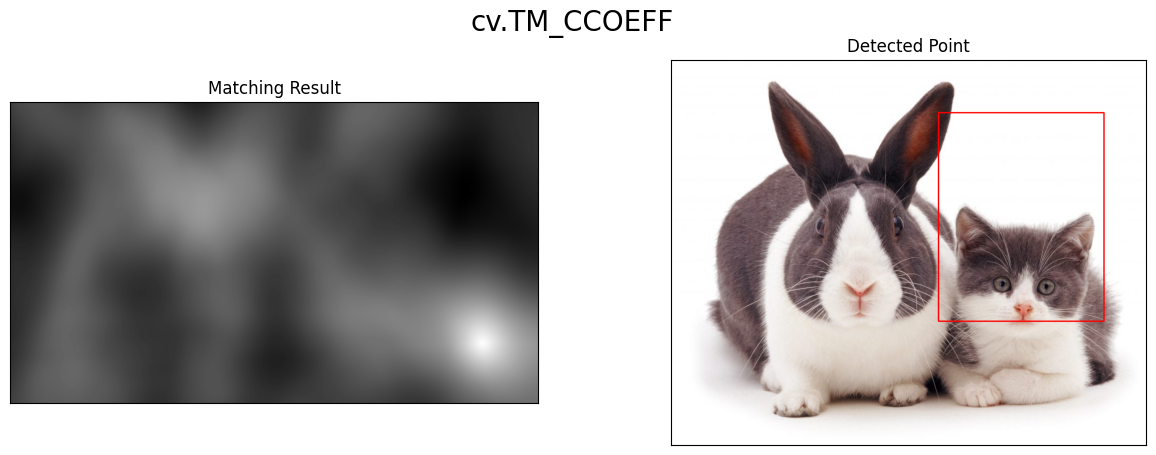

In [4]:
# TM_CCOEFF
template_matching(image.copy(), template.copy(), cv.TM_CCOEFF,"cv.TM_CCOEFF")

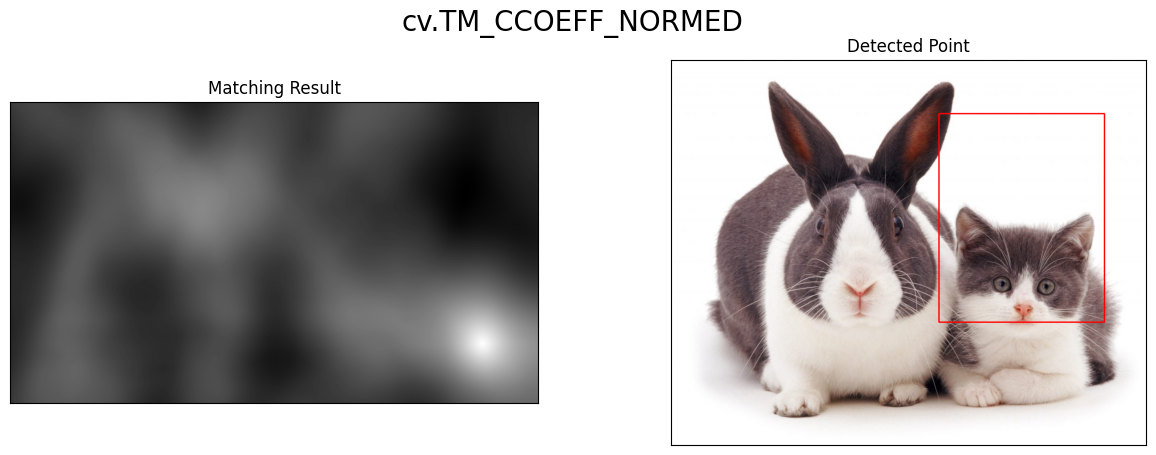

In [5]:
# TM_CCOEFF_NORMED
template_matching(image.copy(), template.copy(), cv.TM_CCOEFF_NORMED,"cv.TM_CCOEFF_NORMED")

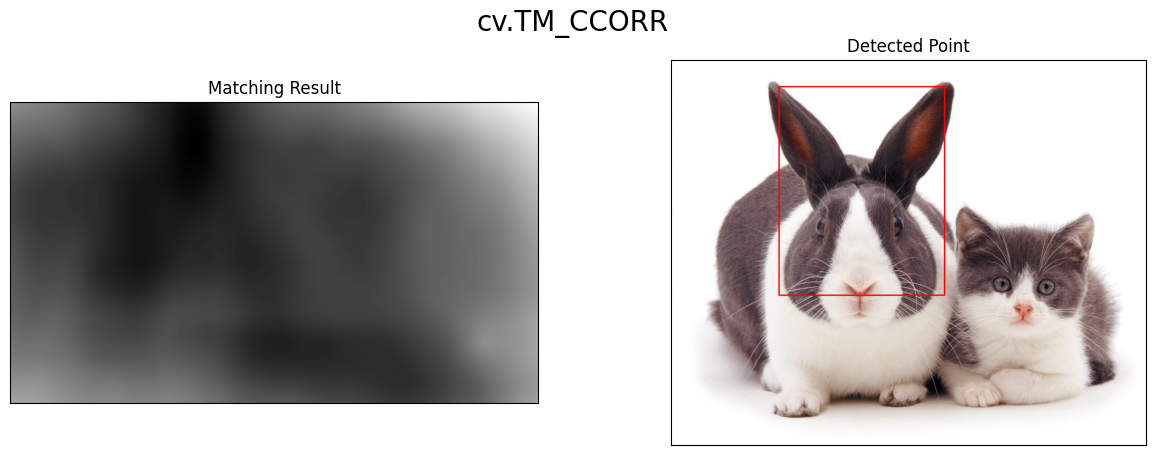

In [6]:
# TM_CCORR
template_matching(image.copy(), template.copy(), cv.TM_CCORR,"cv.TM_CCORR")

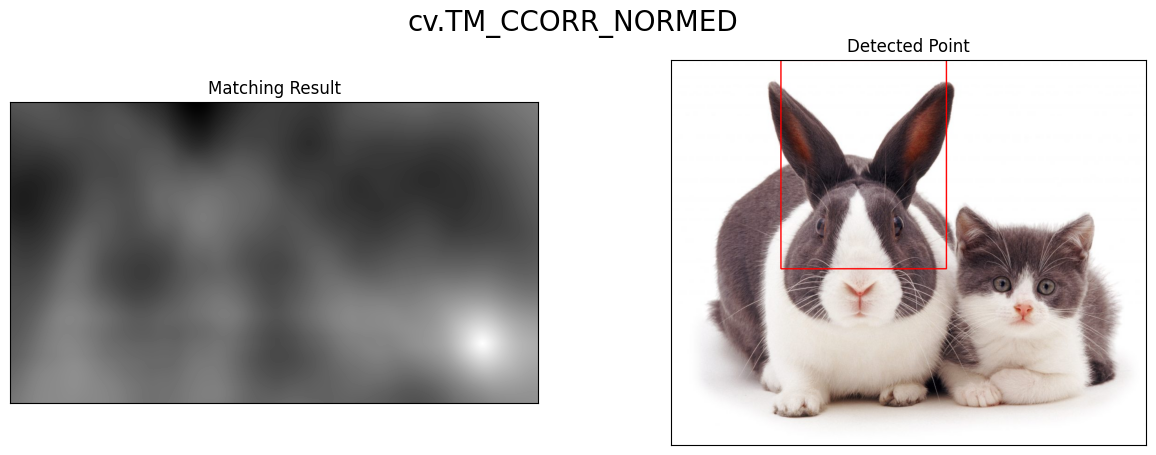

In [7]:
# TM_CCORR_NORMED
template_matching(image.copy(), template.copy(), cv.TM_CCORR_NORMED,"cv.TM_CCORR_NORMED")

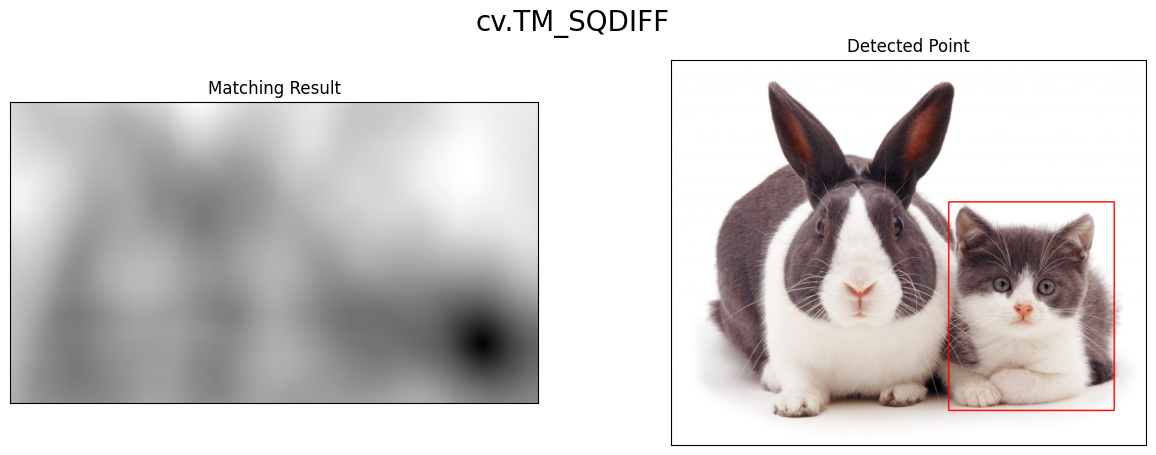

In [8]:
# TM_SQDIFF
template_matching(image.copy(), template.copy(), cv.TM_SQDIFF,"cv.TM_SQDIFF")

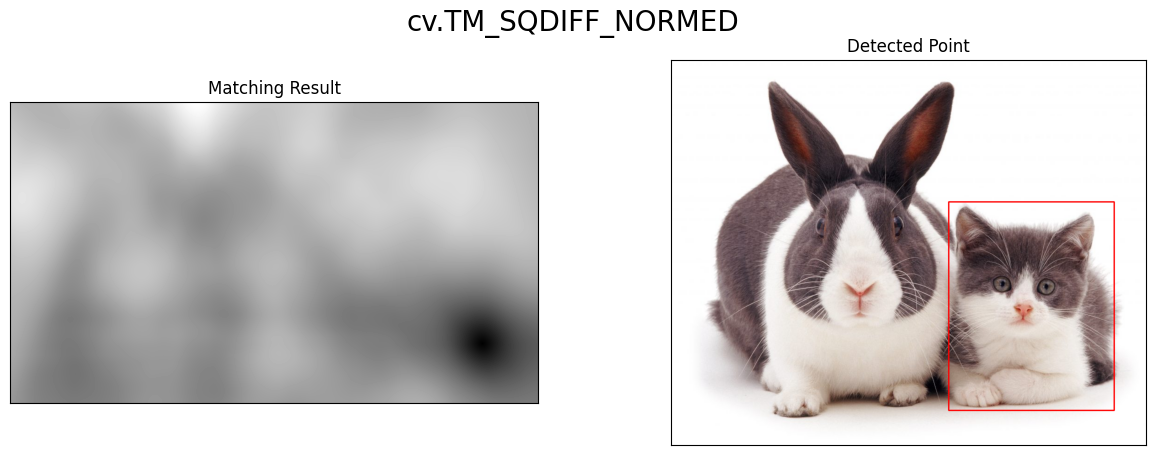

In [9]:
# TM_SQDIFF_NORMED
template_matching(image.copy(), template.copy(), cv.TM_SQDIFF_NORMED,"cv.TM_SQDIFF_NORMED")

3. Implementasikan konsep template matching tanpa menggunakan library OpenCV
untuk multiple object, menggunakan gambar bahrain.jpg untuk citra masukan dan
bahrain-template.jpg sebagai citra template, sehingga menghasilkan output sebagai berikut:

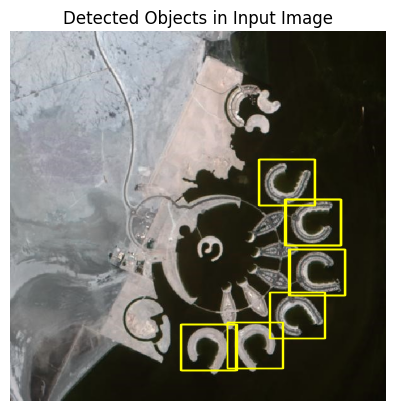

In [10]:

import numpy as np
import matplotlib.pyplot as plt
from skimage import io,transform
import cv2 as cv  # Pastikan Anda mengimpor cv2 sebagai cv

# Baca gambar input dan template
input_image = cv.imread(path + 'Object Detection/bahrain.jpg')
template_image = cv.imread(path + 'Object Detection/bahrain-template.jpg')

def template_matching(input_image, template_images, initial_threshold=350000, max_threshold=7000000, threshold_increment=50000):
    matched_locations = []

    # Konversi gambar input menjadi grayscale
    input_image_gray = cv.cvtColor(input_image, cv.COLOR_BGR2GRAY)

    for template_image in template_images:
        # Konversi template menjadi grayscale
        template_image_gray = cv.cvtColor(template_image, cv.COLOR_BGR2GRAY)

        # Dimensi template
        template_height, template_width = template_image_gray.shape

        # Mulai dengan threshold awal
        threshold = initial_threshold
        found_match = False

        while not found_match and threshold <= max_threshold:
            current_loop = 0
            for i in range(input_image_gray.shape[0] - template_height):
                for j in range(input_image_gray.shape[1] - template_width):
                    # Ambil subregion yang ukurannya sama dengan template
                    subregion = input_image_gray[i:i + template_height, j:j + template_width]

                    # Hitung SSD antara template dan subregion
                    ssd = np.sum((subregion - template_image_gray) ** 2)

                    if ssd < threshold:
                        current_loop += 1
                        # Jika match, simpan posisi koordinat
                        matched_locations.append((i, j))

                        # Setel flag bahwa ada match ditemukan
                        found_match = True

                        # Berhenti jika sudah mencapai jumlah yang cukup
                        if current_loop >= 5:
                            break
                if found_match:
                    break

            # Jika tidak ada match yang cukup, naikkan threshold
            if not found_match:
                threshold += threshold_increment

    return matched_locations

def rotate_image(image, angle):
  height, width = image.shape[:2]
  rotation_matrix = cv.getRotationMatrix2D((width / 2, height / 2), angle, 1)
  rotated_image = cv.warpAffine(image, rotation_matrix, (width, height))  # Tambahkan warpAffine untuk rotasi
  return rotated_image  # Pastikan untuk mengembalikan gambar yang dirotasi


augmented_templates = [
    template_image,
    np.fliplr(rotate_image(template_image, 110)),
    rotate_image(template_image, 300),
    np.fliplr(rotate_image(template_image, 160)),
    rotate_image(template_image,240),
    np.fliplr(rotate_image(template_image,230)),
]

matched_locations = template_matching(input_image, augmented_templates)

# Visualisasi hasil
fig, ax = plt.subplots()
ax.imshow(input_image, cmap='gray')

# Dapatkan template_width dan template_height dari template asli
template_height, template_width, _ = template_image.shape

for (i, j) in matched_locations:
    # Gambar kotak di sekitar lokasi yang terdeteksi
    rect = plt.Rectangle((j, i), template_width, template_height, edgecolor='yellow', facecolor='none', linewidth=1)
    ax.add_patch(rect)

plt.title("Detected Objects in Input Image")
plt.axis("off")
plt.show()

4. Implementasikan metode Sobel Edge Detection, Canny Edge Detection, dan Laplacian Edge Detection pada OpenCV dengan menggunakan gambar car-park.jpg, sehingga menghasilkan luaran sebagai berikut:
<br>a. Sobel Edge Detection
<br>b. Canny Edge Detection
<br>c. Laplacian Edge Detection

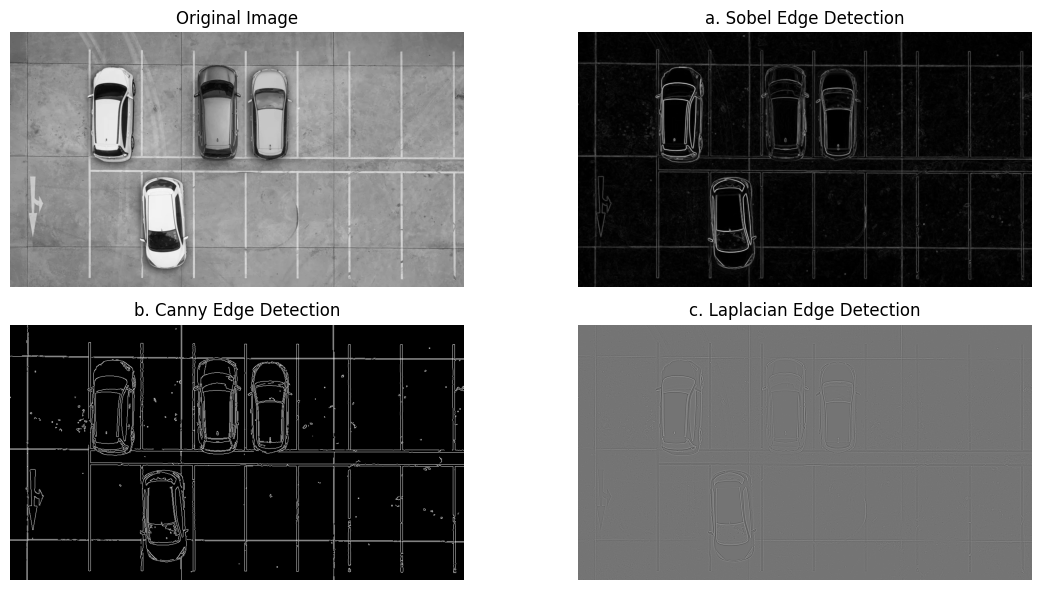

In [12]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

image = cv.imread(path + 'Object Detection/car-park.jpg', cv.IMREAD_GRAYSCALE)

# Sobel Edge Detection
sobel_x = cv.Sobel(image, cv.CV_64F, 1, 0, ksize=3)  # Deteksi tepi pada arah x
sobel_y = cv.Sobel(image, cv.CV_64F, 0, 1, ksize=3)  # Deteksi tepi pada arah y
sobel_combined = cv.magnitude(sobel_x, sobel_y)       # Kombinasi magnitudo hasil Sobel x dan y

# Canny Edge Detection
canny_edges = cv.Canny(image, 100, 200)

# Laplacian Edge Detection
laplacian = cv.Laplacian(image, cv.CV_64F)

# Visualisasi hasil
plt.figure(figsize=(12, 6))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap='gray')
plt.title("Original Image")
plt.axis("off")

plt.subplot(2, 2, 2)
plt.imshow(sobel_combined, cmap='gray')
plt.title("a. Sobel Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(canny_edges, cmap='gray')
plt.title("b. Canny Edge Detection")
plt.axis("off")

plt.subplot(2, 2, 4)
plt.imshow(laplacian, cmap='gray')
plt.title("c. Laplacian Edge Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

5. Implementasikan metode Harris Corner Detection dan Shi-Tomasi Detection pada
OpenCV dengan menggunakan gambar chess-board.jpg, sehingga menghasilkan
luaran sebagai berikut:

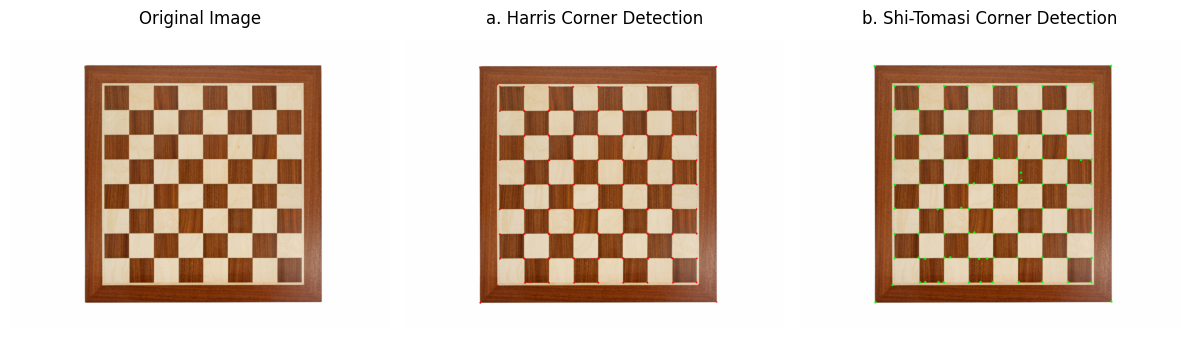

In [13]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image = cv.imread(path + 'Object Detection/chess-board.jpg')

# Konversi gambar ke grayscale
gray_image = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Harris Corner Detection
gray_harris = np.float32(gray_image)
harris_corners = cv.cornerHarris(gray_harris, blockSize=2, ksize=3, k=0.04)
harris_corners = cv.dilate(harris_corners, None)  # Dilation untuk memperjelas titik sudut
image_harris = image.copy()
image_harris[harris_corners > 0.01 * harris_corners.max()] = [0, 0, 255]  # Tampilkan sudut dengan warna merah

# Shi-Tomasi Corner Detection (Good Features to Track)
shi_tomasi_corners = cv.goodFeaturesToTrack(gray_image, maxCorners=100, qualityLevel=0.01, minDistance=10)
shi_tomasi_corners = np.intp(shi_tomasi_corners)
image_shi_tomasi = image.copy()
for i in shi_tomasi_corners:
    x, y = i.ravel()
    cv.circle(image_shi_tomasi, (x, y), 3, (0, 255, 0), -1)  # Tampilkan sudut dengan warna hijau

# Visualisasi hasil
plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")

plt.subplot(1, 3, 2)
plt.imshow(cv.cvtColor(image_harris, cv.COLOR_BGR2RGB))
plt.title("a. Harris Corner Detection")
plt.axis("off")

plt.subplot(1, 3, 3)
plt.imshow(cv.cvtColor(image_shi_tomasi, cv.COLOR_BGR2RGB))
plt.title("b. Shi-Tomasi Corner Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

6. Implementasikan metode Hough Transform pada OpenCV dengan menggunakan
gambar sudoku.jpg. Tahapan proses grid detection sesuai yang terdapat pada ulasan teori, sehingga menghasilkan luaran sebagai berikut:

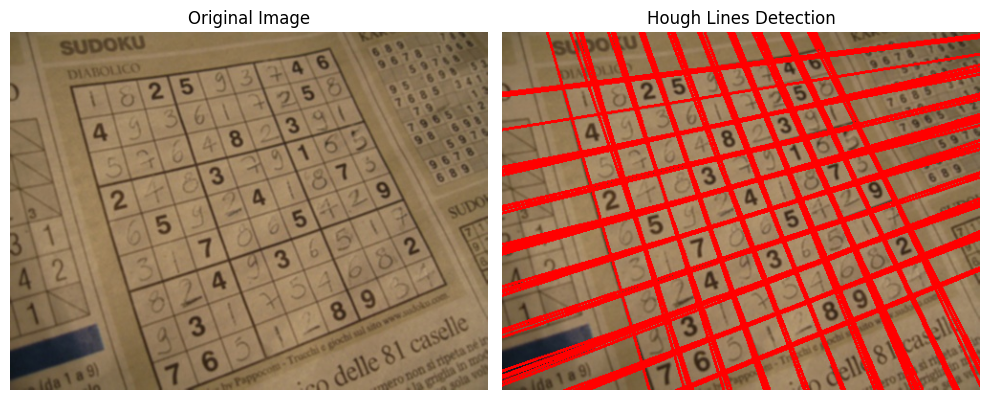

In [14]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Baca gambar
image = cv.imread(path + 'Object Detection/sudoku.jpg')

# Konversi gambar ke grayscale
gray = cv.cvtColor(image, cv.COLOR_BGR2GRAY)

# Deteksi tepi
edges = cv.Canny(gray, threshold1=100, threshold2=140)

# Hough Line Transform
lines = cv.HoughLines(edges, rho=1, theta=np.pi / 180, threshold=140)

# Gambar garis yang terdeteksi pada gambar asli
image_with_lines = image.copy()
if lines is not None:
    for line in lines:
        rho, theta = line[0]
        a = np.cos(theta)
        b = np.sin(theta)
        x0 = a * rho
        y0 = b * rho
        x1 = int(x0 + 1000 * (-b))
        y1 = int(y0 + 1000 * (a))
        x2 = int(x0 - 1000 * (-b))
        y2 = int(y0 - 1000 * (a))
        cv.line(image_with_lines, (x1, y1), (x2, y2), (0, 0, 255), 2)  # Garis berwarna merah

# Visualisasi hasil
plt.figure(figsize=(10, 5))

plt.subplot(1, 2, 1)
plt.imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
plt.title("Original Image")
plt.axis("off")


plt.subplot(1, 2, 2)
plt.imshow(cv.cvtColor(image_with_lines, cv.COLOR_BGR2RGB))
plt.title("Hough Lines Detection")
plt.axis("off")

plt.tight_layout()
plt.show()

7. Implementasikan fungsi findContours() pada OpenCV untuk contour detection dengan menggunakan gambar laptop.jpg, sehingga menghasilkan luaran sebagai berikut:

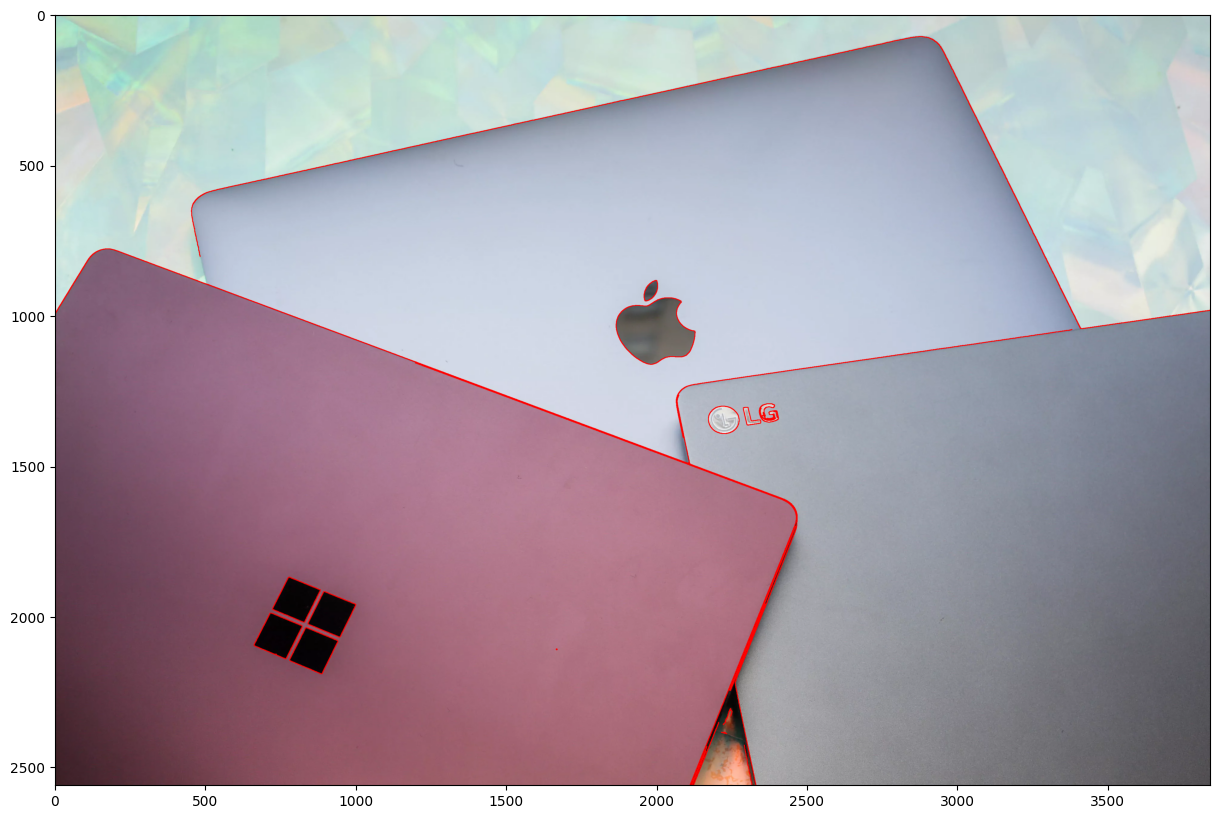

In [16]:
def detect_contours(image_path):
    # Baca gambar dan verifikasi
    img = cv.imread(path + 'Object Detection/laptop.jpg')

    # Konversi ke grayscale
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

    # Blur untuk mengurangi noise
    blurred = cv.GaussianBlur(gray, (5, 5), 0)

    # Deteksi tepi menggunakan Canny
    edges = cv.Canny(blurred, 50, 150)

    # Temukan kontur
    contours, _ = cv.findContours(edges, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)

    # Buat salinan gambar untuk menggambar kontur
    result = img.copy()

    # Gambar kontur dengan warna merah
    cv.drawContours(result, contours, -1, (0, 0, 255), 2)

    # Matikan mode interaktif matplotlib
    plt.ioff()

    # Buat figure baru
    plt.figure(figsize=(15, 10))

    # Konversi BGR ke RGB untuk matplotlib
    result_rgb = cv.cvtColor(result, cv.COLOR_BGR2RGB)

    # Tampilkan gambar
    plt.imshow(result_rgb)

    # Simpan dan tampilkan
    plt.savefig('laptop_contours_output.png', bbox_inches='tight', pad_inches=0)

    # Tampilkan plot
    plt.show()

    # Tutup figure untuk membersihkan memori
    plt.close()

# Jalankan fungsi dengan try-except untuk debugging
try:
    # Ganti dengan path gambar yang benar
    image_path = '/content/drive/MyDrive/PCVK/Images/laptop.jpg'  # Pastikan ini sesuai dengan lokasi file Anda
    detect_contours(image_path)
except Exception as e:
    print(f"Error terjadi: {str(e)}")
    import traceback
    traceback.print_exc()

## Pengayaan Materi KTP

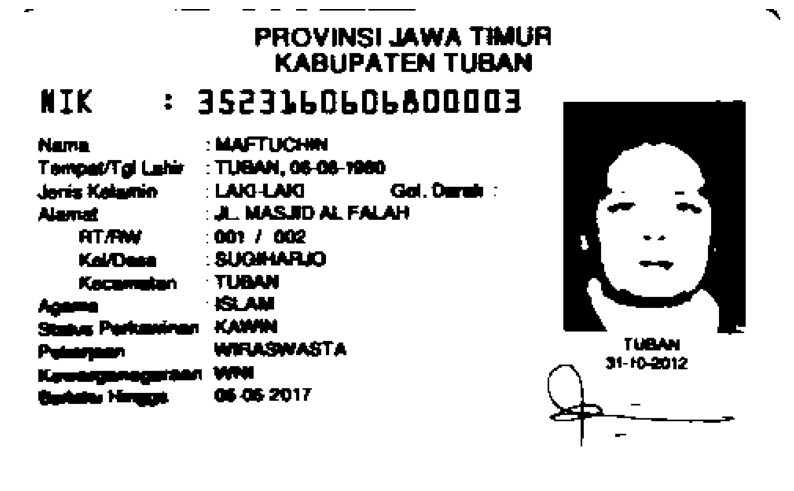

In [19]:
# Membaca gambar KTP
ktp = cv.imread(path + 'Object Detection/ktp3.png')

# Mengubah ke grayscale dan menerapkan Gaussian Blur langsung
gray_blurred = cv.GaussianBlur(cv.cvtColor(ktp, cv.COLOR_BGR2GRAY), (5, 5), 0.5)

# Melakukan thresholding dengan metode Otsu
_, bw = cv.threshold(gray_blurred, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Menampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(bw, cmap='gray'), plt.axis('off')
plt.show()

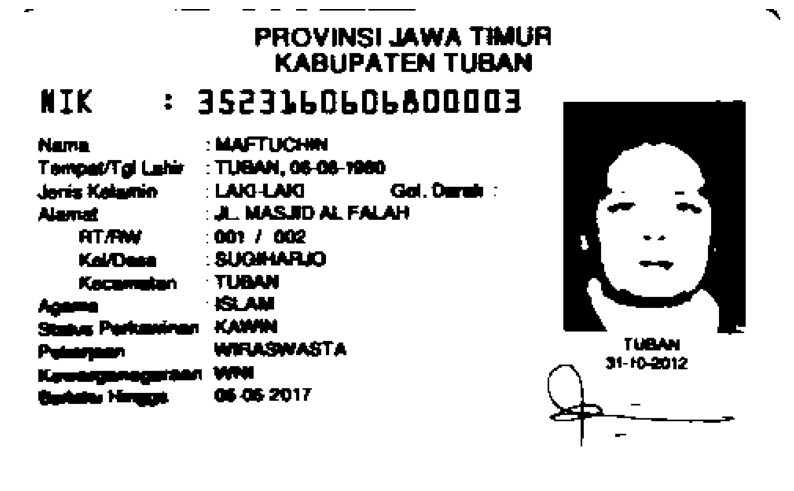

In [20]:
# Membaca gambar KTP
ktp = cv.imread(path + 'Object Detection/ktp3.png')

# Mengubah ke grayscale dan menerapkan Gaussian Blur langsung
gray_blurred = cv.GaussianBlur(cv.cvtColor(ktp, cv.COLOR_BGR2GRAY), (5, 5), 0.5)

# Melakukan thresholding dengan metode Otsu
_, bw = cv.threshold(gray_blurred, 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Menetapkan morfologi erosi untuk mengurangi karakter yang berhimpitan
eroded_image = cv.erode(bw, cv.getStructuringElement(cv.MORPH_RECT, (1, 1)))

# Menampilkan hasil
plt.figure(figsize=(10, 10))
plt.imshow(eroded_image, cmap='gray'), plt.axis('off')
plt.show()

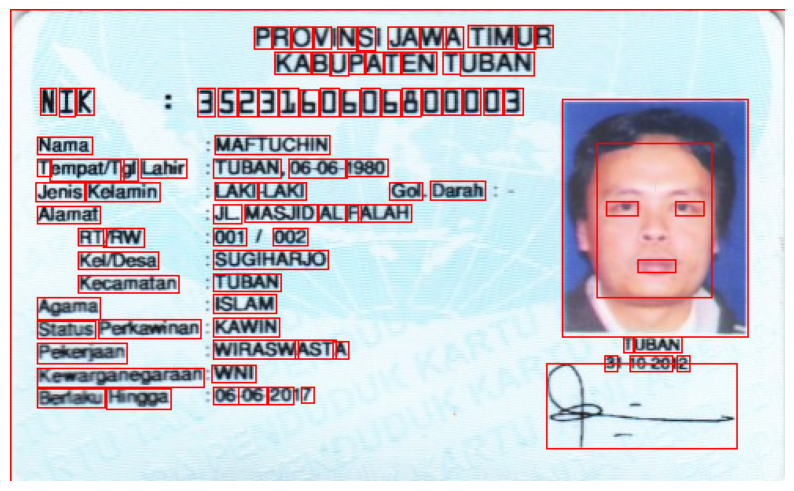

In [21]:
# Copy images for processing and drawing
img = eroded_image.copy()
img_draw = ktp.copy()

# Find contours
contours, _ = cv.findContours(img, cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Loop through contours and apply conditions to draw rectangles
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    aspect_ratio = w / h

    # Draw rectangles based on size and aspect ratio
    if (h >= 40 and w >= 10 and aspect_ratio <= 1) or \
       (h >= 8 and w >= 8 and aspect_ratio <= 10) or \
       (h >= 10 and w >= 7 and aspect_ratio <= 8):
        cv.rectangle(img_draw, (x, y), (x + w, y + h), (0, 0, 255), 1)

# Display the result
plt.figure(figsize=(10, 10))
plt.imshow(cv.cvtColor(img_draw, cv.COLOR_BGR2RGB)), plt.axis('off')
plt.show()

## Tugas Praktikum

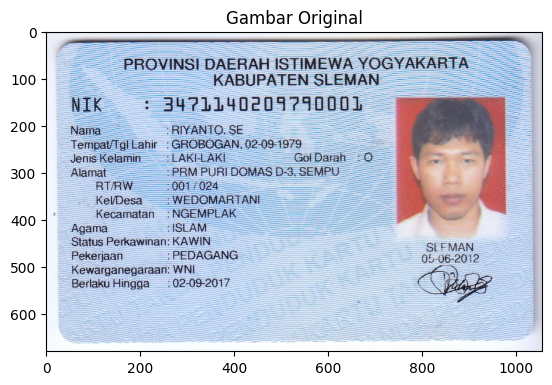

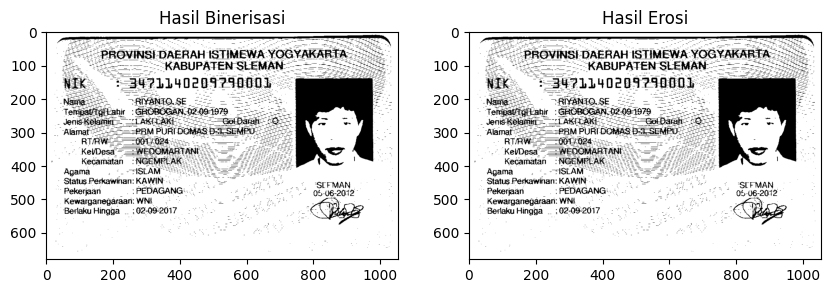

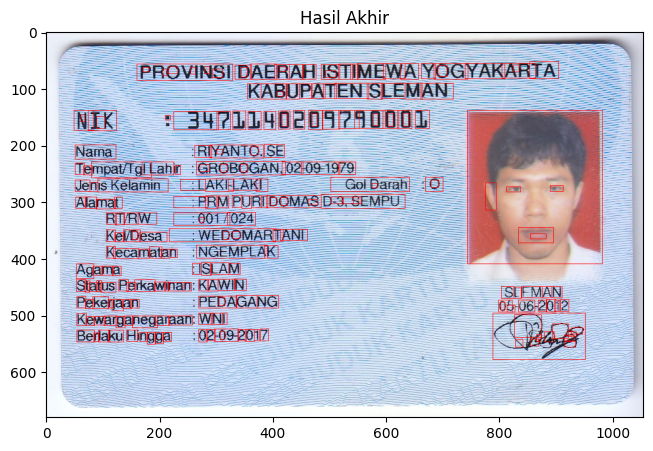

In [22]:
ktpRiyanto = cv.imread(path + 'Object Detection/KTP_More/ktp.png')
ori = cv.cvtColor(ktpRiyanto.copy(), cv.COLOR_BGR2RGB)

# Gaussian Blur untuk mengurangi noise
blurred = cv.GaussianBlur(ktpRiyanto, (5, 5), 0.5)

# Konversi ke citra grayscale
gray = cv.cvtColor(blurred, cv.COLOR_BGR2GRAY)

# Binerisasi dengan metode Otsu
ret, bw = cv.threshold(gray.copy(), 0, 255, cv.THRESH_BINARY + cv.THRESH_OTSU)

# Erosi setelah operasi binerisasi
erode = cv.erode(bw.copy(), cv.getStructuringElement(cv.MORPH_OPEN, (1, 1)))

# Ekstraksi kontur
contours, hierarchy = cv.findContours(erode.copy(), cv.RETR_TREE, cv.CHAIN_APPROX_NONE)

# Looping kontur untuk pemilihan berdasarkan ukuran dan rasio
for cnt in contours:
    x, y, w, h = cv.boundingRect(cnt)
    ras = format(w / h, '.2f')
    if h >= 40 and w >= 10 and float(ras) <= 1:
        cv.rectangle(ktpRiyanto, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 8 and w >= 8 and float(ras) <= 10:
        cv.rectangle(ktpRiyanto, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)
    elif h >= 10 and w >= 7 and float(ras) <= 8:
        cv.rectangle(ktpRiyanto, (x, y), (x + w, y + h), (0, 0, 255), thickness=1)

# Menampilkan gambar matplotlib
plt.subplots(1)
plt.title("Gambar Original")
plt.imshow(ori)

fig, axs = plt.subplots(1, 2, figsize=(10, 5))

axs[0].set_title('Hasil Binerisasi')
axs[0].imshow(bw, cmap='gray')

axs[1].set_title('Hasil Erosi')
axs[1].imshow(erode, cmap='gray')

fig1, axs1 = plt.subplots(figsize=(10, 5))
axs1.set_title('Hasil Akhir')
axs1.imshow(cv.cvtColor(ktpRiyanto, cv.COLOR_BGR2RGB))

plt.show()

In [24]:
!apt-get install -y texlive texlive-xetex texlive-latex-extra pandoc

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following additional packages will be installed:
  dvisvgm fonts-droid-fallback fonts-lato fonts-lmodern fonts-noto-mono fonts-texgyre
  fonts-urw-base35 libapache-pom-java libcmark-gfm-extensions0.29.0.gfm.3 libcmark-gfm0.29.0.gfm.3
  libcommons-logging-java libcommons-parent-java libfontbox-java libfontenc1 libgs9 libgs9-common
  libidn12 libijs-0.35 libjbig2dec0 libkpathsea6 libpdfbox-java libptexenc1 libruby3.0 libsynctex2
  libteckit0 libtexlua53 libtexluajit2 libwoff1 libzzip-0-13 lmodern pandoc-data poppler-data
  preview-latex-style rake ruby ruby-net-telnet ruby-rubygems ruby-webrick ruby-xmlrpc ruby3.0
  rubygems-integration t1utils teckit tex-common tex-gyre texlive-base texlive-binaries
  texlive-fonts-recommended texlive-latex-base texlive-latex-recommended texlive-pictures
  texlive-plain-generic tipa xfonts-encodings xfonts-utils
Suggested packages:
  fonts-noto fonts-fre

In [25]:
!jupyter nbconvert --to pdf /content/Week11_17.ipynb

[NbConvertApp] Converting notebook /content/Week11_17.ipynb to pdf
[NbConvertApp] Support files will be in Week11_17_files/
[NbConvertApp] Making directory ./Week11_17_files
[NbConvertApp] Writing 71736 bytes to notebook.tex
[NbConvertApp] Building PDF
[NbConvertApp] Running xelatex 3 times: ['xelatex', 'notebook.tex', '-quiet']
[NbConvertApp] Running bibtex 1 time: ['bibtex', 'notebook']
[NbConvertApp] WARNING | bibtex had problems, most likely because there were no citations
[NbConvertApp] PDF successfully created
[NbConvertApp] Writing 4579875 bytes to /content/Week11_17.pdf
